# **MNIST classification with TensorFlow model**

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/Python/ICA'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [85]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

tf.reset_default_graph()

# load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('tensorflowModel.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./tensorflowModel.ckpt


In [0]:
graph = tf.get_default_graph()
input_node = graph.get_tensor_by_name('x_1:0')
input_2 = graph.get_tensor_by_name('keep_prob:0')
output_node = graph.get_tensor_by_name('Softmax:0')

4489
prediction:  9
real value:  9


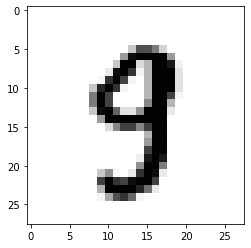

In [7]:
i=randint(1, mnist.test.images.shape[0])
print(i)
plt.imshow(mnist.test.images[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", argmax(sess.run('Softmax:0', feed_dict={'x_1:0': mnist.test.images[i:i+1], 'keep_prob:0': 1.0})))
print("real value: ", argmax(mnist.test.labels[i:i+1]))

In [77]:
times_batch4=[]
start_time=time.time()
for x in range(100):
  start_time_one_batch=time.time()
  sess.run(output_node, feed_dict={input_node: mnist.test.images[0:4], input_2: 1.0})
  end_time_one_batch=time.time()
  times_batch4.append((end_time_one_batch-start_time_one_batch)*1000)
end_time=time.time()
print("Time in sec: ",(end_time-start_time)*1)

Time in sec:  0.19915986061096191


In [78]:
times_batch1000=[]
start_time=time.time()
for x in range(1000):
  start_time_one_batch=time.time()
  sess.run(output_node, feed_dict={input_node: mnist.test.images[0:1000], input_2: 1.0})
  end_time_one_batch=time.time()
  times_batch1000.append((end_time_one_batch-start_time_one_batch)*1000)
end_time=time.time()
print("Time in sec: ",(end_time-start_time)*1)

Time in sec:  21.361088514328003


Average time [ms]:  1.9872617721557617


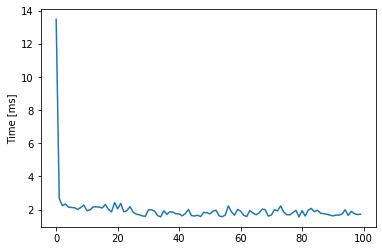

In [88]:
plt.plot(times_batch4[:])
plt.ylabel('Time [ms]')
print('Average time [ms]: ',sum(times_batch4[:])/len(times_batch4[:]))

Average time [ms]:  21.357967853546143


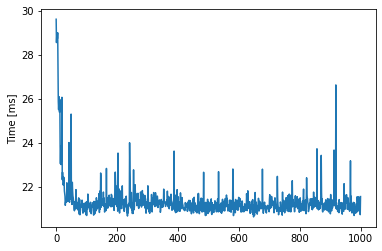

In [89]:
plt.plot(times_batch1000[:])
plt.ylabel('Time [ms]')
print('Average time [ms]: ',sum(times_batch1000[:])/len(times_batch1000[:]))